In [1]:

!pip install torch torchvision torchaudio

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Python314\python.exe -m pip install --upgrade pip


In [2]:


!pip install torchvision


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Python314\python.exe -m pip install --upgrade pip


In [4]:
import sys
print(sys.executable)


c:\Users\sumit\AppData\Local\Programs\Python\Python313\python.exe


In [5]:
import sys
!{sys.executable} -m pip install torchvision


   ---------------------------------------- 0.0/4.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.5/4.3 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 4.3/4.3 MB 17.8 MB/s  0:00:00
   ---------------------------------------- 0.0/113.8 MB ? eta -:--:--
   -- ------------------------------------- 6.3/113.8 MB 31.8 MB/s eta 0:00:04
   ----- ---------------------------------- 14.7/113.8 MB 35.2 MB/s eta 0:00:03
   -------- ------------------------------- 24.6/113.8 MB 39.3 MB/s eta 0:00:03
   ------------ --------------------------- 35.1/113.8 MB 41.9 MB/s eta 0:00:02
   ---------------- ----------------------- 47.2/113.8 MB 45.0 MB/s eta 0:00:02
   ------------------- -------------------- 56.4/113.8 MB 45.0 MB/s eta 0:00:02
   ---------------------- ----------------- 63.4/113.8 MB 42.9 MB/s eta 0:00:02
   ------------------------- -------------- 72.9/113.8 MB 43.2 MB/s eta 0:00:01
   ----------------------------- ---------- 84.7/113.8 MB 44.6 MB/s eta

  You can safely remove it manually.

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import seaborn as sns
import time
import numpy as np


In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


In [10]:

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_data = MNIST('./data', train=True, download=True, transform=transform)
test_data = MNIST('./data', train=False, transform=transform)

train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128)

In [11]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.model(x)

In [12]:
def train_model(optimizer_name, optimizer_fn):
    model = SimpleNN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optimizer_fn(model.parameters())

    train_losses = []

    for epoch in range(5):
        model.train()
        running_loss = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)
        print(f"{optimizer_name} | Epoch [{epoch+1}/5] | Loss: {avg_loss:.4f}")

    return train_losses


In [13]:
optimizers = {
    "SGD": lambda params: optim.SGD(params, lr=0.01),
    "SGD+Momentum": lambda params: optim.SGD(params, lr=0.01, momentum=0.9),
    "RMSprop": lambda params: optim.RMSprop(params, lr=0.001),
    "Adam": lambda params: optim.Adam(params, lr=0.001),
    "AdamW": lambda params: optim.AdamW(params, lr=0.001),
}

In [14]:
results = {}

for name, opt_fn in optimizers.items():
    print("\n" + "="*40)
    print("Training with", name)
    print("="*40)
    losses = train_model(name, opt_fn)
    results[name] = losses



Training with SGD
SGD | Epoch [1/5] | Loss: 1.1731
SGD | Epoch [2/5] | Loss: 0.4008
SGD | Epoch [3/5] | Loss: 0.3218
SGD | Epoch [4/5] | Loss: 0.2839
SGD | Epoch [5/5] | Loss: 0.2571

Training with SGD+Momentum
SGD+Momentum | Epoch [1/5] | Loss: 0.4331
SGD+Momentum | Epoch [2/5] | Loss: 0.1522
SGD+Momentum | Epoch [3/5] | Loss: 0.1019
SGD+Momentum | Epoch [4/5] | Loss: 0.0768
SGD+Momentum | Epoch [5/5] | Loss: 0.0586

Training with RMSprop
RMSprop | Epoch [1/5] | Loss: 0.2463
RMSprop | Epoch [2/5] | Loss: 0.0975
RMSprop | Epoch [3/5] | Loss: 0.0657
RMSprop | Epoch [4/5] | Loss: 0.0484
RMSprop | Epoch [5/5] | Loss: 0.0372

Training with Adam
Adam | Epoch [1/5] | Loss: 0.2657
Adam | Epoch [2/5] | Loss: 0.1031
Adam | Epoch [3/5] | Loss: 0.0684
Adam | Epoch [4/5] | Loss: 0.0505
Adam | Epoch [5/5] | Loss: 0.0403

Training with AdamW
AdamW | Epoch [1/5] | Loss: 0.2689
AdamW | Epoch [2/5] | Loss: 0.1010
AdamW | Epoch [3/5] | Loss: 0.0693
AdamW | Epoch [4/5] | Loss: 0.0514
AdamW | Epoch [5/5]

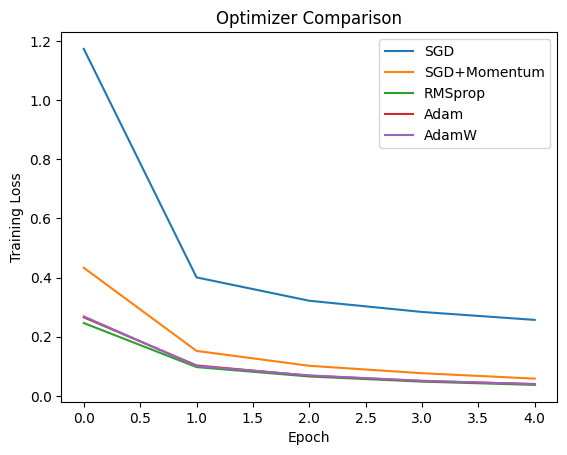

In [15]:
for name, losses in results.items():
    plt.plot(losses, label=name)

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Optimizer Comparison")
plt.legend()
plt.show()

In [19]:
def train_and_evaluate(optimizer_name, optimizer_fn, epochs=5):
    model = SimpleNN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optimizer_fn(model.parameters())

    train_losses = []
    train_accuracies = []
    start_time = time.time()

    for epoch in range(epochs):
        model.train()
        correct = 0
        total = 0
        running_loss = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_losses.append(running_loss / len(train_loader))
        train_accuracies.append(100 * correct / total)

        print(f"{optimizer_name} | Epoch [{epoch+1}/{epochs}] "
              f"| Loss: {train_losses[-1]:.4f} "
              f"| Train Acc: {train_accuracies[-1]:.2f}%")

    training_time = time.time() - start_time

    # ================= TEST EVALUATION =================
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    test_accuracy = 100 * correct / total

    return {
        "loss": train_losses,
        "train_acc": train_accuracies,
        "test_acc": test_accuracy,
        "time": training_time,
        "conf_matrix": confusion_matrix(all_labels, all_preds)
    }


In [20]:
optimizers = {
    "SGD": lambda p: optim.SGD(p, lr=0.01),
    "SGD+Momentum": lambda p: optim.SGD(p, lr=0.01, momentum=0.9),
    "RMSprop": lambda p: optim.RMSprop(p, lr=0.001),
    "Adam": lambda p: optim.Adam(p, lr=0.001),
    "AdamW": lambda p: optim.AdamW(p, lr=0.001),
}

results = {}

for name, opt_fn in optimizers.items():
    print("\n" + "="*50)
    print("Training with", name)
    print("="*50)
    results[name] = train_and_evaluate(name, opt_fn)



Training with SGD
SGD | Epoch [1/5] | Loss: 1.1955 | Train Acc: 70.61%
SGD | Epoch [2/5] | Loss: 0.4044 | Train Acc: 88.89%
SGD | Epoch [3/5] | Loss: 0.3216 | Train Acc: 90.79%
SGD | Epoch [4/5] | Loss: 0.2840 | Train Acc: 91.78%
SGD | Epoch [5/5] | Loss: 0.2570 | Train Acc: 92.58%

Training with SGD+Momentum
SGD+Momentum | Epoch [1/5] | Loss: 0.4253 | Train Acc: 88.01%
SGD+Momentum | Epoch [2/5] | Loss: 0.1520 | Train Acc: 95.49%
SGD+Momentum | Epoch [3/5] | Loss: 0.1037 | Train Acc: 96.92%
SGD+Momentum | Epoch [4/5] | Loss: 0.0766 | Train Acc: 97.74%
SGD+Momentum | Epoch [5/5] | Loss: 0.0590 | Train Acc: 98.20%

Training with RMSprop
RMSprop | Epoch [1/5] | Loss: 0.2461 | Train Acc: 92.52%
RMSprop | Epoch [2/5] | Loss: 0.0959 | Train Acc: 97.05%
RMSprop | Epoch [3/5] | Loss: 0.0645 | Train Acc: 97.97%
RMSprop | Epoch [4/5] | Loss: 0.0474 | Train Acc: 98.50%
RMSprop | Epoch [5/5] | Loss: 0.0368 | Train Acc: 98.80%

Training with Adam
Adam | Epoch [1/5] | Loss: 0.2644 | Train Acc: 92.

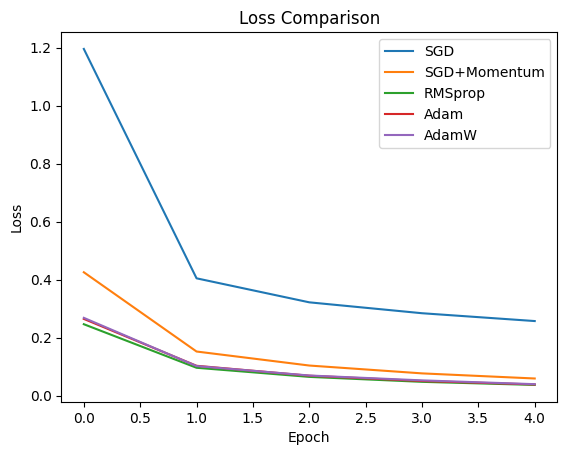

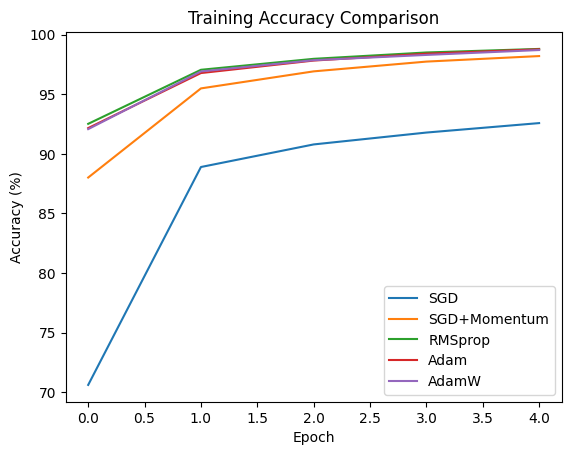


FINAL TEST ACCURACY & TIME
SGD             | Test Acc: 93.38% | Time: 57.28 sec
SGD+Momentum    | Test Acc: 97.49% | Time: 59.28 sec
RMSprop         | Test Acc: 97.88% | Time: 59.84 sec
Adam            | Test Acc: 97.49% | Time: 59.91 sec
AdamW           | Test Acc: 97.72% | Time: 60.22 sec

Best Optimizer: RMSprop


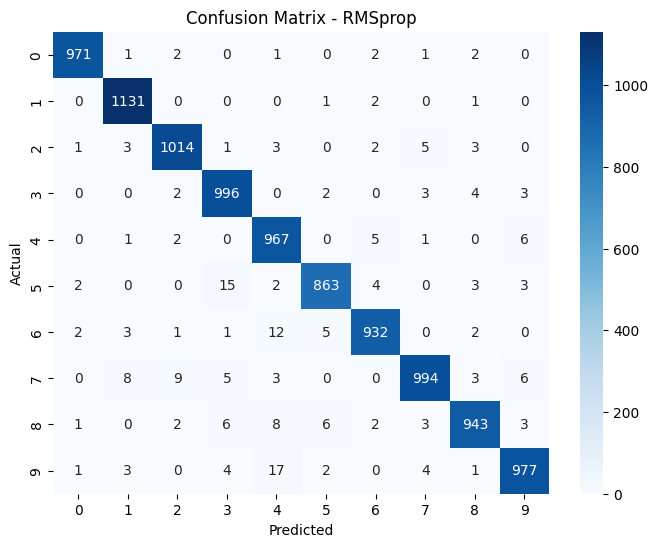

In [21]:

plt.figure()
for name in results:
    plt.plot(results[name]["loss"], label=name)

plt.title("Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()



plt.figure()
for name in results:
    plt.plot(results[name]["train_acc"], label=name)

plt.title("Training Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()



print("\nFINAL TEST ACCURACY & TIME")
print("="*50)
for name in results:
    print(f"{name:15} | Test Acc: {results[name]['test_acc']:.2f}% "
          f"| Time: {results[name]['time']:.2f} sec")



best_optimizer = max(results, key=lambda x: results[x]["test_acc"])
print("\nBest Optimizer:", best_optimizer)

plt.figure(figsize=(8,6))
sns.heatmap(results[best_optimizer]["conf_matrix"],
            annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {best_optimizer}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()